# ***START***

# Import Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
import cv2
import os
import random

In [ ]:
from glob import glob

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Dataset

In [ ]:
new_path = '/content/drive/MyDrive/Dataset/AugData'

In [ ]:
os.listdir(new_path)

['ModerateDemented', 'MildDemented', 'VeryMildDemented', 'NonDemented']

In [ ]:
NonDemented_files = glob(new_path + '/NonDemented/*.jpg')
ModerateDemented_files = glob(new_path + '/ModerateDemented/*.jpg')
MildDemented_files = glob(new_path + '/MildDemented/*.jpg')
VeryMildDemented_files = glob(new_path + '/VeryMildDemented/*.jpg')

In [ ]:
print(len(NonDemented_files))
print(len(ModerateDemented_files))
print(len(MildDemented_files))
print(len(VeryMildDemented_files))

3200
600
1400
2500


In [ ]:
categories = os.listdir(new_path)
image_paths =[]
labels = []

for category in categories:
  category_path = os.path.join(new_path,category)
  for image in os.listdir(category_path):
    image_path = os.path.join(category_path,image)
    image_paths.append(image_path)
    labels.append(category)

In [ ]:
df = pd.DataFrame()
df['image_paths'] = image_paths
df['labels'] = labels

In [ ]:
df['labels'].value_counts()

,count
labels,
NonDemented,3200
VeryMildDemented,2500
MildDemented,1400
ModerateDemented,600


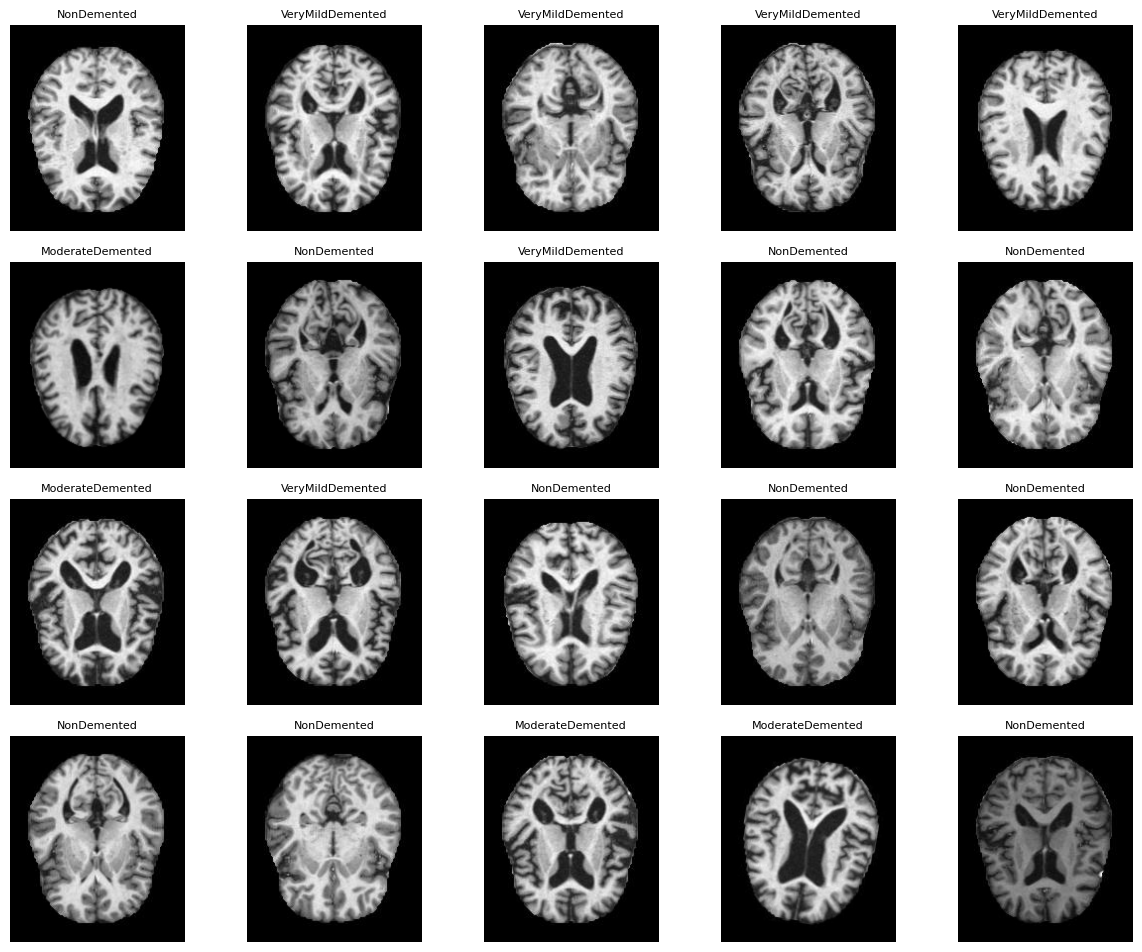

In [ ]:
num_images = 20

sample_df = df.sample(num_images).reset_index(drop=True)

plt.figure(figsize=(12, 12))

for i in range(num_images):
    img_path = sample_df.loc[i, 'image_paths']
    label = sample_df.loc[i, 'labels']

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(7700, 2)

# Dataset Preparation

In [ ]:
import keras
from keras import layers
from keras import ops
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Padding to Resize


In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Dataset/AugData'
VAL_DIR = '/content/drive/MyDrive/Dataset/OriginalDataset/validation'
TEST_DIR = '/content/drive/MyDrive/Dataset/OriginalDataset/test'
BATCH_SIZE = 32
IMG_SIZE = 256

In [ ]:
def pad_to_square(img, target_size=IMG_SIZE):
    h, w = img.shape[:2]
    scale = target_size / max(h, w)
    resized = cv2.resize(img, (int(w * scale), int(h * scale)))

    delta_w = target_size - resized.shape[1]
    delta_h = target_size - resized.shape[0]
    top = delta_h // 2
    bottom = delta_h - top
    left = delta_w // 2
    right = delta_w - left

    padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded / 255.0

Train-Validation-Test

In [ ]:
def preprocess_input(img):
    return pad_to_square(img, target_size=IMG_SIZE)

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 7700 images belonging to 4 classes.
Found 1113 images belonging to 4 classes.
Found 645 images belonging to 4 classes.


# Data Generate



In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, models
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np
# import cv2

In [ ]:
# TRAIN_DIR = '/content/drive/MyDrive/Dataset/AugData'
# VAL_DIR = '/content/drive/MyDrive/Dataset/OriginalDataset/validation'
# TEST_DIR = '/content/drive/MyDrive/Dataset/OriginalDataset/test'

# BATCH_SIZE = 32
# IMG_SIZE = (256, 256)

In [ ]:
# def pad_to_square(img, target_size=IMG_SIZE):
#     h, w = img.shape[:2]
#     scale = target_size[0] / max(h, w)
#     resized = cv2.resize(img, (int(w * scale), int(h * scale)))

#     delta_w = target_size[0] - resized.shape[1]
#     delta_h = target_size[1] - resized.shape[0]
#     top, bottom = delta_h // 2, delta_h - (delta_h // 2)
#     left, right = delta_w // 2, delta_w - (delta_w // 2)

#     padded = cv2.copyMakeBorder(resized, top, bottom, left, right,
#                                 cv2.BORDER_CONSTANT, value=[0, 0, 0])
#     return padded / 255.0

# def preprocess_input(img):
#     return pad_to_square(img, target_size=IMG_SIZE)

In [ ]:
# import os

# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# if not os.path.exists(TRAIN_DIR):
#     print(f"Error: Training directory not found at {TRAIN_DIR}. Please ensure Google Drive is mounted and the path is correct.")
# else:
#     train_data = train_datagen.flow_from_directory(
#         TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
#         class_mode='categorical', shuffle=True
#     )

#     val_data = val_datagen.flow_from_directory(
#         VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
#         class_mode='categorical', shuffle=False
#     )

#     test_data = test_datagen.flow_from_directory(
#         TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
#         class_mode='categorical', shuffle=False
#     )
#     NUM_CLASSES = train_data.num_classes

# Teacher Model (Resnet50 Updated Version[Functional API])

In [ ]:
NUM_CLASSES = 4
base_teacher = keras.applications.ResNet50(
    include_top=False, weights="imagenet", input_shape=(256,256,3)
)

x = layers.GlobalAveragePooling2D()(base_teacher.output)
x = layers.Dropout(0.5)(x)
teacher_output = layers.Dense(NUM_CLASSES, activation="softmax")(x)

teacher_model = keras.Model(inputs=base_teacher.input, outputs=teacher_output)

for layer in base_teacher.layers[:-30]:
    layer.trainable = False

teacher_model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print(" Teacher model ready.")


 Teacher model ready.


# Student Model (Custom CNN)

In [ ]:
def build_student(num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=(256,256,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation="relu"),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model

student_model = build_student(NUM_CLASSES)
print(" Student model ready.")

 Student model ready.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Knowledge Distillation

In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher, temperature=5.0, alpha=0.5, **kwargs):
        super().__init__(**kwargs)
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha
        self.student_loss_fn = keras.losses.CategoricalCrossentropy()
        self.distill_loss_fn = keras.losses.KLDivergence()
        self.acc_metric = keras.metrics.CategoricalAccuracy(name="accuracy")
        self.precision_metric = keras.metrics.Precision(name="precision")
        self.recall_metric = keras.metrics.Recall(name="recall")
        self.auc_metric = keras.metrics.AUC(name="auc")


    def compile(self, optimizer, metrics=None):
        super().compile()
        self.optimizer = optimizer
        self.student_loss_tracker = keras.metrics.Mean(name="student_loss")
        self.distill_loss_tracker = keras.metrics.Mean(name="distill_loss")
        self.total_loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.student_loss_tracker,
            self.distill_loss_tracker,
            self.acc_metric,
            self.precision_metric,
            self.recall_metric,
            self.auc_metric,
        ]


    def train_step(self, data):
        x, y = data
        teacher_preds = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_preds = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_preds)
            soft_teacher = tf.nn.softmax(teacher_preds / self.temperature)
            soft_student = tf.nn.softmax(student_preds / self.temperature)
            distill_loss = self.distill_loss_fn(soft_teacher, soft_student)
            loss = self.alpha * student_loss + (1 - self.alpha) * distill_loss

        grads = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.student.trainable_variables))

        self.student_loss_tracker.update_state(student_loss)
        self.distill_loss_tracker.update_state(distill_loss)
        self.total_loss_tracker.update_state(loss)
        self.precision_metric.update_state(y, student_preds)
        self.recall_metric.update_state(y, student_preds)
        self.auc_metric.update_state(y, student_preds)
        self.acc_metric.update_state(y, student_preds)

        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data
        student_preds = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, student_preds)

        self.student_loss_tracker.update_state(student_loss)
        self.total_loss_tracker.update_state(student_loss)  # No distill loss during testing
        self.acc_metric.update_state(y, student_preds)
        self.precision_metric.update_state(y, student_preds)
        self.recall_metric.update_state(y, student_preds)
        self.auc_metric.update_state(y, student_preds)

        return {m.name: m.result() for m in self.metrics}

    def call(self, inputs, training=False):
        return self.student(inputs, training=training)

In [ ]:
distiller = Distiller(student=student_model, teacher=teacher_model, temperature=5, alpha=0.5)
distiller.compile(optimizer=keras.optimizers.Adam(1e-4))

history = distiller.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 59s 177ms/step - accuracy: 0.3709 - auc: 0.6515 - distill_loss: 0.0022 - loss: 0.6566 - precision: 0.3648 - recall: 0.0154 - student_loss: 1.3110 - val_accuracy: 0.4744 - val_auc: 0.7892 - val_distill_loss: 0.0000e+00 - val_loss: 1.0911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_student_loss: 1.0911 - learning_rate: 1.0000e-04
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 29s 119ms/step - accuracy: 0.3979 - auc: 0.6940 - distill_loss: 0.0031 - loss: 0.6244 - precision: 0.5561 - recall: 0.0210 - student_loss: 1.2458 - val_accuracy: 0.4744 - val_auc: 0.7894 - val_distill_loss: 0.0000e+00 - val_loss: 1.0972 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_student_loss: 1.0972 - learning_rate: 1.0000e-04
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.4178 - auc: 0.7020 - distill_loss: 0.0031 - loss: 0.6186 - precision: 0.5844 - recall: 0.0268 - student_loss: 1.2340 - val_accuracy: 0.4744 - val_auc: 0.7893 

In [ ]:
batch = next(test_data)
distiller(batch[0])  # This builds the model

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[0.20984615, 0.09232069, 0.33460054, 0.3632326 ],
       [0.19504158, 0.08746306, 0.36076105, 0.35673428],
       [0.1569761 , 0.07133314, 0.43489718, 0.3367936 ],
       [0.12474109, 0.05843137, 0.50618124, 0.31064633],
       [0.12360379, 0.05884494, 0.50936675, 0.30818453],
       [0.13137548, 0.06160598, 0.49176443, 0.31525418],
       [0.17338243, 0.07541479, 0.40374658, 0.34745625],
       [0.2619819 , 0.11606542, 0.26135892, 0.36059383],
       [0.16807461, 0.07584048, 0.413647  , 0.3424379 ],
       [0.13013968, 0.06174957, 0.4965036 , 0.31160718],
       [0.14376342, 0.06506657, 0.46104875, 0.33012122],
       [0.21873052, 0.0958966 , 0.32149303, 0.36387986],
       [0.05336457, 0.02735855, 0.7197281 , 0.19954872],
       [0.16275282, 0.07379365, 0.4250293 , 0.33842415],
       [0.17510813, 0.07819555, 0.39747387, 0.34922245],
       [0.13933975, 0.06454355, 0.4726123 , 0.32350448],
       [0.11596864, 0.05518765, 0.53339

In [ ]:
distiller.save('/content/drive/MyDrive/Training_Progress/Alzheimer3.keras')

In [ ]:
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1] * 100:.2f}%")

Test Loss: 0.9851, Test Accuracy: 98.51%
